# python = 3.6 cpu

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def logisticDIY():
    #数据预处理
    filename = 'watermelon.txt'
    f = open(filename , 'r')

    mat = f.readlines()
    for i in range(len(mat)):
        mat[i] = mat[i].strip().split('\t')
    mat = np.array(mat)
    mat = mat.astype(float)

    #结构搭建
    input_x = tf.placeholder(tf.float32, [None, 2], name = 'input_x')
    output_y = tf.placeholder(tf.float32, [None, 1], name = 'output_y')

    w = tf.Variable(tf.truncated_normal([2,1] , stddev = 0.1) , name = 'weight1')
    b = tf.Variable(tf.zeros([1]))

    y = tf.add(tf.matmul( input_x , w ) , b)

    #cost = tf.reduce_mean(tf.pow(tf.subtract( y , output_y ) , 2))
    #sigmoid 函数激活后的lost
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits= y ,labels= output_y )
    #optimizer = tf.train.RMSPropOptimizer(0.1).minimize(cost)
    optimizer = tf.train.AdamOptimizer(1).minimize(cost)#越大越好效果
    
    writer = tf.summary.FileWriter('/home/a503wangsiqi/tensorboard/logisticDIY_log',tf.get_default_graph())
    writer.close()
    sess = tf.InteractiveSession()

    tf.global_variables_initializer().run()

    m=mat.shape[0]

    for i in range(50):
        opt = sess.run( optimizer , feed_dict= { input_x: mat[:,1:3], output_y : mat[:,3].reshape([-1,1])})
        cost_ = sess.run(cost , feed_dict= {input_x : mat[:,1:3], output_y : mat[:,3].reshape([-1,1])})
        y_ = sess.run(tf.sigmoid(y) , feed_dict= {input_x : mat[:,1:3]})
        s = 0
        for i in range(m):
            if (y_[i]>=0.5 and mat[i,3]==1) or (y_[i]<0.5 and mat[i,3]==0) :
                s+=1
        print('accuracy:', s/m)
    w_ = sess.run(w)
    b_ = sess.run(b)

    print(w_,b_)


    #画图
    xcord1=[]
    ycord1=[]
    xcord2=[]
    ycord2=[]
    for i in range(m):
        if mat[i,3]==1:
            xcord1.append(mat[i,1])
            ycord1.append(mat[i,2])
        else:
            xcord2.append(mat[i,1])
            ycord2.append(mat[i,2])
    plt.figure(1)
    ax=plt.subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x=np.linspace(0.2,0.8,30)
    #x = x/10
    y=((-b_-w_[0]*x)/w_[1])

    plt.sca(ax)
    plt.plot(x,y)      #ramdomgradAscent
    #plt.plot(x,y[0])   #gradAscent
    plt.xlabel('density')
    plt.ylabel('ratio_sugar')
    #plt.title('gradAscent logistic regression')
    plt.title('ramdom gradAscent logistic regression')
    plt.show()

accuracy: 0.5
accuracy: 0.5
accuracy: 0.5
accuracy: 0.5
accuracy: 0.5
accuracy: 0.6875
accuracy: 0.8125
accuracy: 0.6875
accuracy: 0.6875
accuracy: 0.6875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.9375
accuracy: 0.8125
accuracy: 0.8125
accuracy: 0.8125
accuracy: 0.9375
accuracy: 0.875
accuracy: 0.875
accuracy: 0.8125
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.9375
accuracy: 0.9375
accuracy: 0.9375
accuracy: 0.9375
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.9375
accuracy: 0.9375
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
accuracy: 0.875
[[ -3.29427409]
 [ 24.88112831]] [-2.55521297]


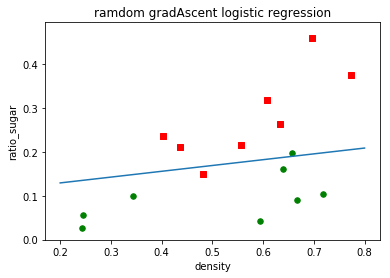

In [5]:
logisticDIY()